# Linear Regression on Heart Disease Prediction


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
df = pd.read_csv("Heart_Disease_Prediction.csv")
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [ ]:
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
10%,42.000000,0.000000,2.000000,110.000000,194.800000,0.000000,0.000000,115.900000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
90%,66.000000,1.000000,4.000000,152.000000,309.000000,1.000000,2.000000,178.000000,1.000000,2.60000,2.000000,2.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [ ]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

### Basic plotting and visualization on the data set

**Pairplots using seaborn**

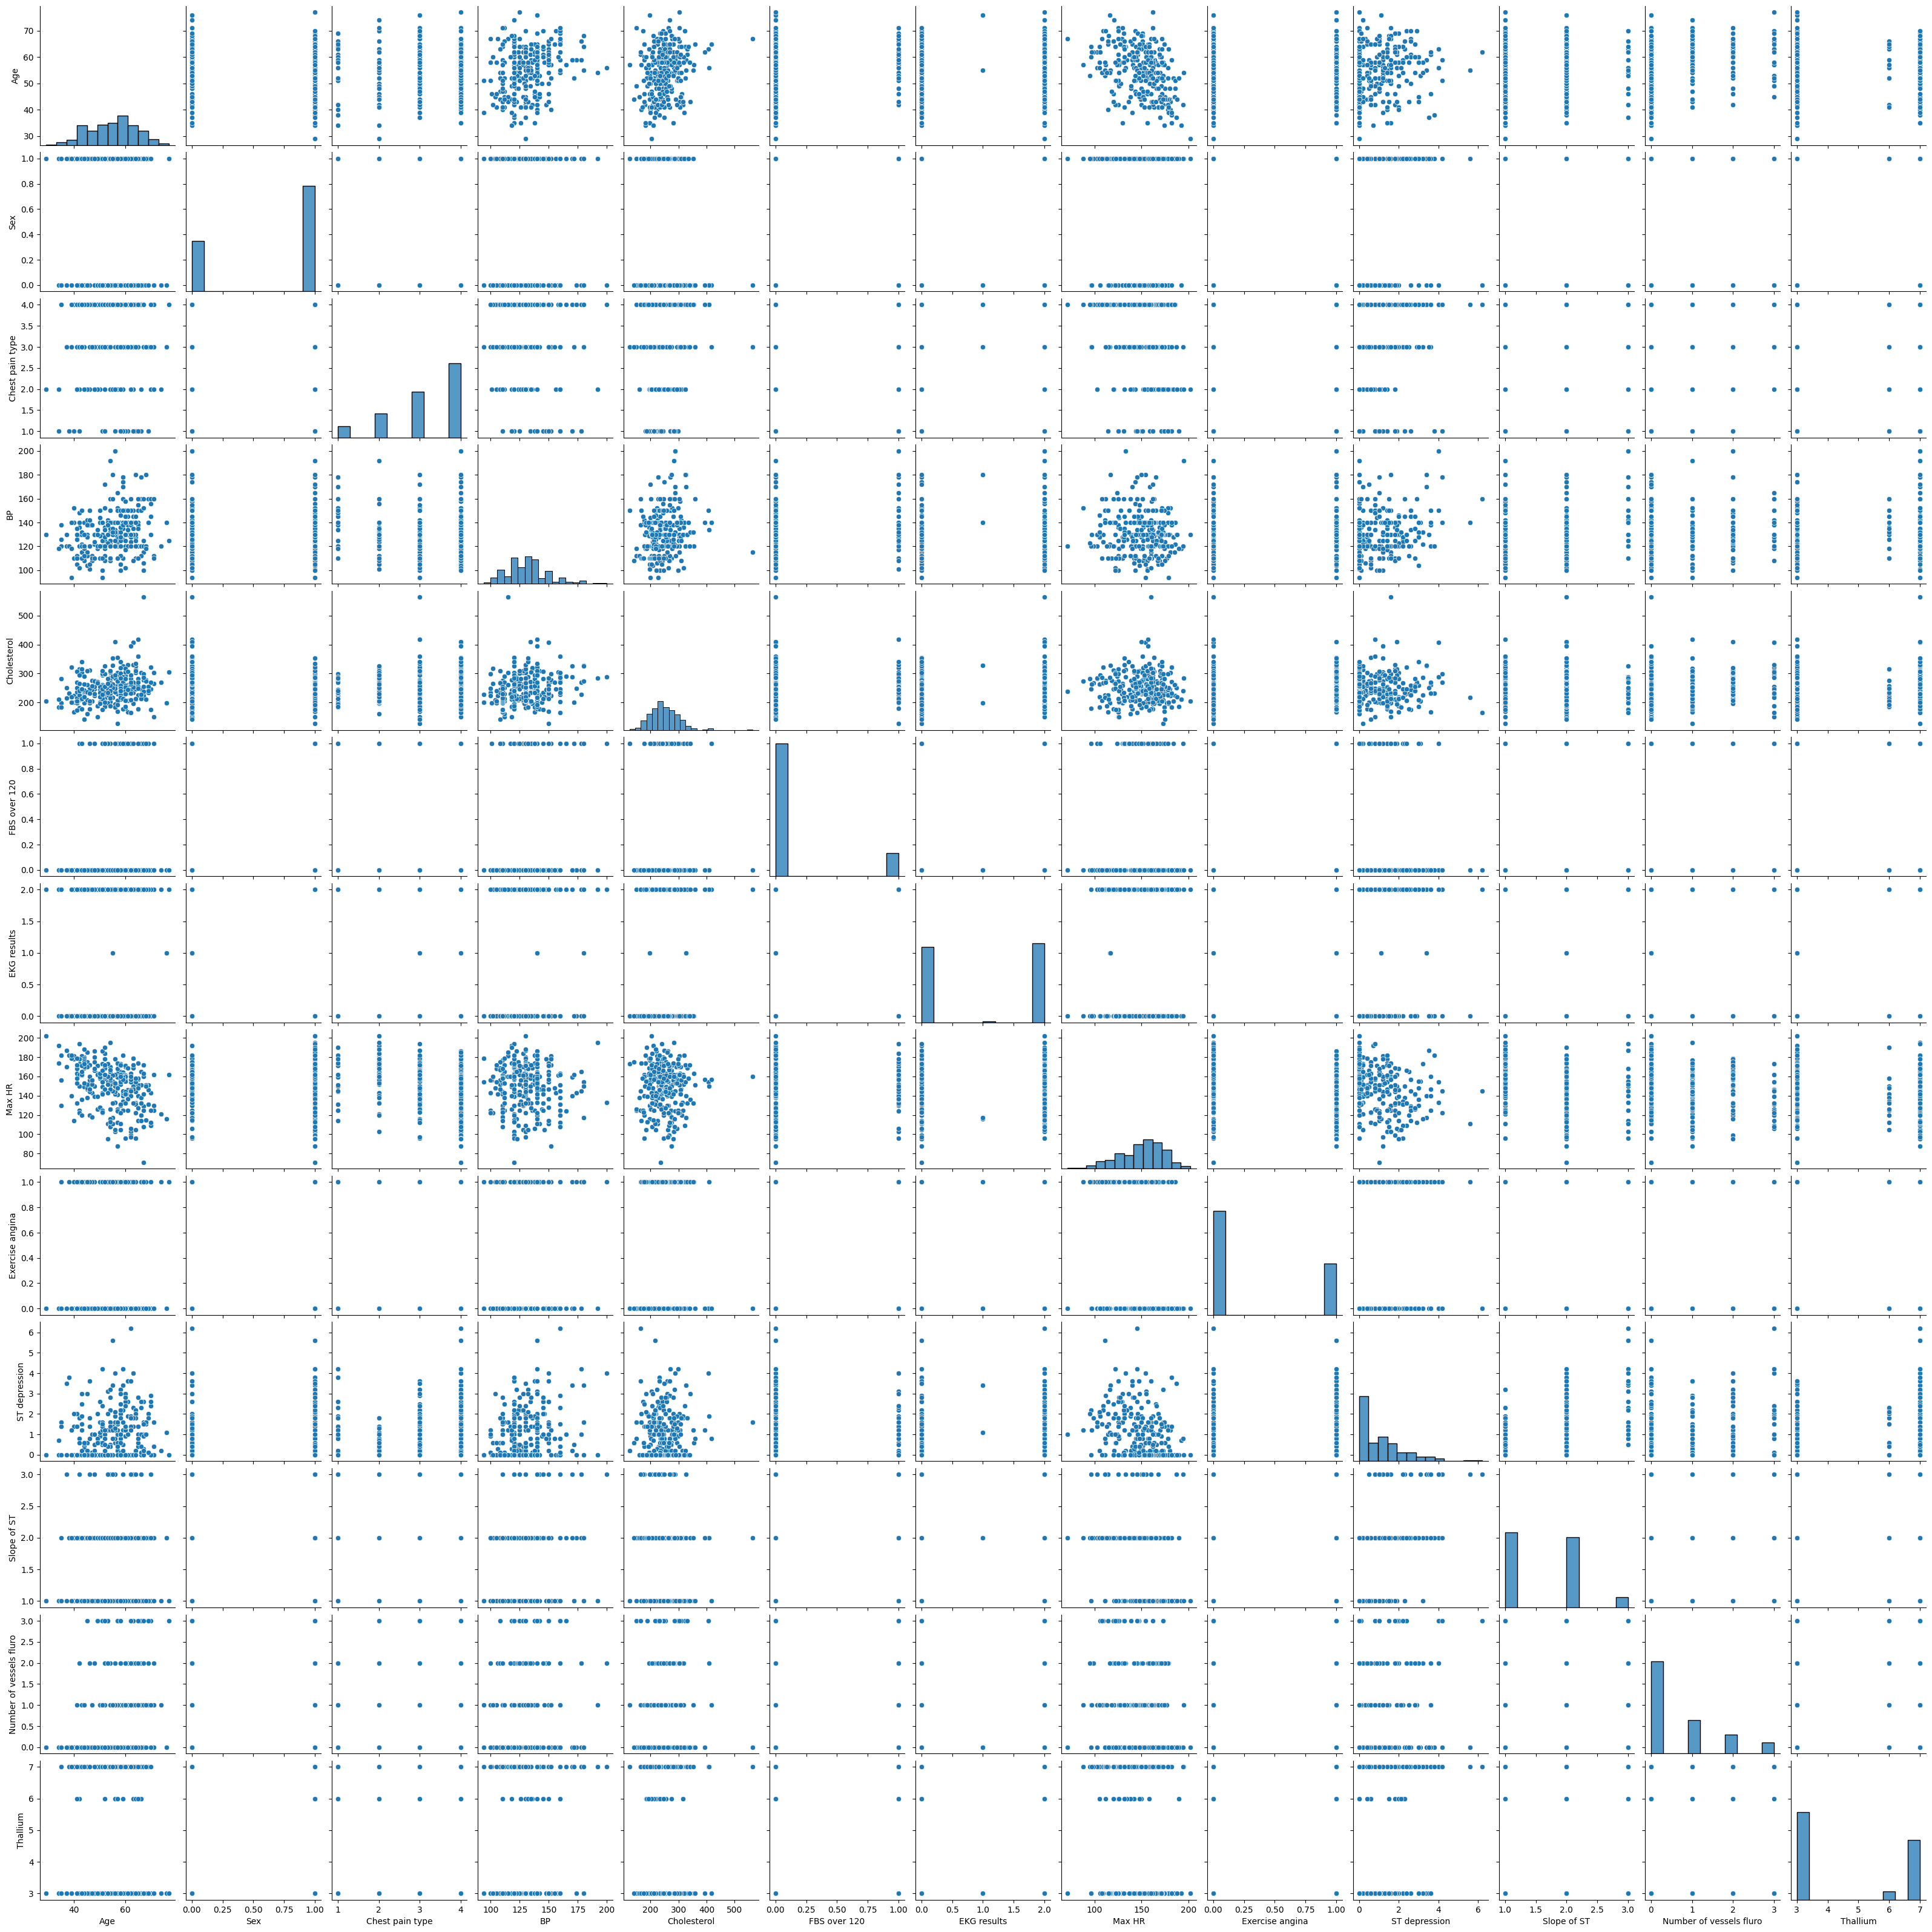

In [ ]:
sns.pairplot(df)

**Distribution of price (the predicted quantity)**

In [ ]:
df['Heart Disease'] = df['Heart Disease'].map({
    'Absence': 0,
    'Presence': 1
})

In [ ]:
df['Heart Disease'].value_counts()

,count
Heart Disease,
Absence,150
Presence,120


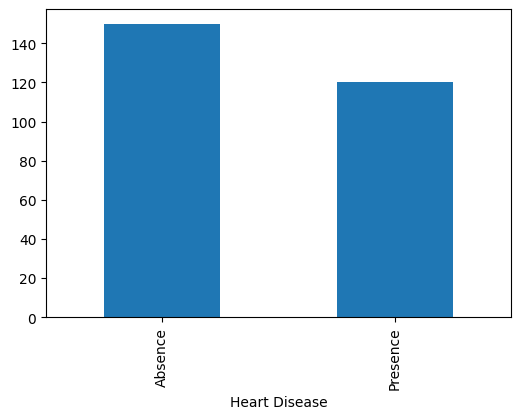

In [ ]:
df['Heart Disease'].value_counts().plot(kind='bar', figsize=(6,4))
plt.show()


<Axes: ylabel='Density'>

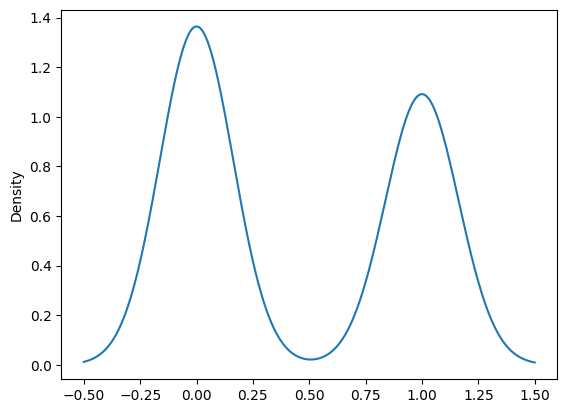

In [ ]:
df['Heart Disease'].plot.density()

**Correlation matrix and heatmap**

In [ ]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = df_numeric.corr()
corr_matrix


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
Age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046
Chest pain type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659
BP,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045
Cholesterol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836
FBS over 120,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237
EKG results,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337
Max HR,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397
Exercise angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449
ST depression,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333


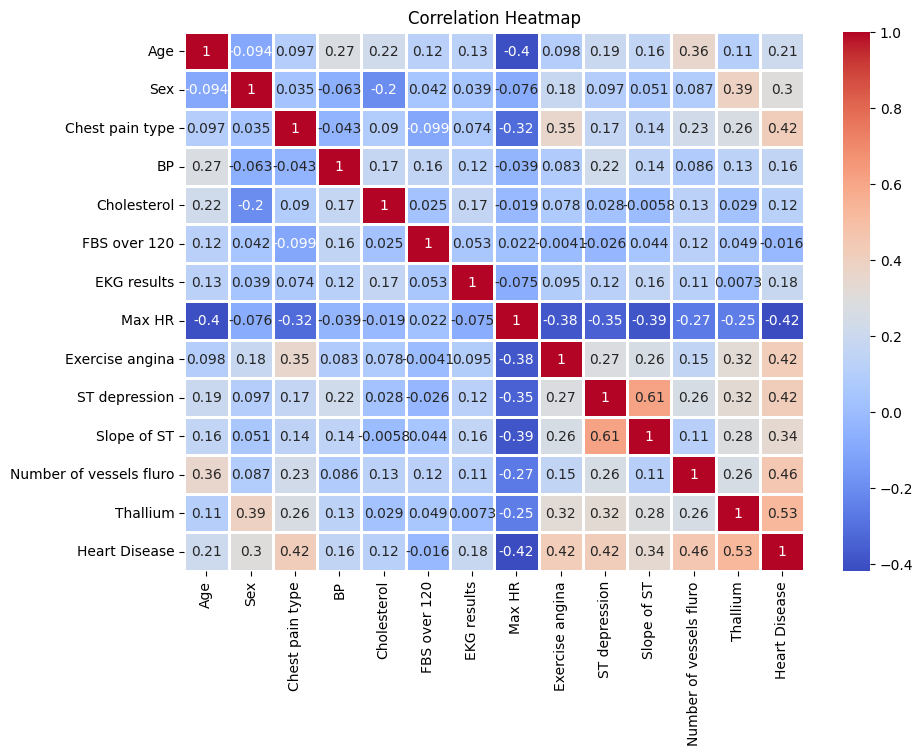

In [ ]:
df_corr = df.copy()

df_corr['Heart Disease'] = df_corr['Heart Disease'].map({
    'Absence': 0,
    'Presence': 1
})

plt.figure(figsize=(10,7))
sns.heatmap(df_corr.corr(), annot=True, linewidths=2, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


### Feature and variable sets

**Make a list of data frame column names**

In [ ]:
l_column = list(df.columns) # Making a list out of column names
len_feature = len(l_column) # Length of column vector list
l_column

['Age',
 'Sex',
 'Chest pain type',
 'BP',
 'Cholesterol',
 'FBS over 120',
 'EKG results',
 'Max HR',
 'Exercise angina',
 'ST depression',
 'Slope of ST',
 'Number of vessels fluro',
 'Thallium',
 'Heart Disease']

**Put all the numerical features in X and Price in y,<br>
ignore Address which is string for linear regression**

In [ ]:
X = df[l_column[0:len_feature-1]]
y = df[l_column[len_feature-1]]

In [ ]:
print("Feature set size:",X.shape)
print("Variable set size:",y.shape)

Feature set size: (270, 13)
Variable set size: (270,)


In [ ]:
df['Heart Disease'] = df['Heart Disease'].map({
    'Absence': 0,
    'Presence': 1
})


In [ ]:
df['Heart Disease'].dtype
df['Heart Disease'].unique()


array([1, 0])

In [ ]:
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']


In [ ]:
X.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3


In [ ]:
y.head()

,Heart Disease
0,1
1,0
2,1
3,0
4,0


### Test-train split

**Import train_test_split function from scikit-learn**

In [ ]:
from sklearn.model_selection import train_test_split

**Create X and y train and test splits in one command using <br>
a split ratio and a random seed**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.3, random_state=123)

**Check the size and shape of train/test splits (it should be in the ratio as per test_size parameter above)**

In [ ]:
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (189, 13)
Test feature set size: (81, 13)
Training variable set size: (189,)
Test variable set size: (81,)


### Model fit and training

**Import linear regression model estimator from scikit-learn and instantiate**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
lm = LinearRegression() # Creating a Linear Regression object 'lm'

**Fit the model on to the instantiated object itself**

In [ ]:
lm.fit(X_train,y_train) # Fit the linear model on to the 'lm' object itself i.e. no need to set this to another variable

LinearRegression()

**Check the intercept and coefficients and put them in a DataFrame**

In [ ]:
print("The intercept term of the linear model:", lm.intercept_)

The intercept term of the linear model: -0.14408083033681773


In [ ]:
print("The coefficients of the linear model:", lm.coef_)

The coefficients of the linear model: [-0.00173575  0.18945814  0.10737413  0.00236061  0.00028787 -0.0353811
  0.01173913 -0.00396202  0.09690451  0.02496958 -0.01605497  0.1314751
  0.06287649]


In [ ]:
#idict = {'Coefficients':lm.intercept_}
#idf = pd.DataFrame(data=idict,index=['Intercept'])
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
#cdf=pd.concat([idf,cdf], axis=0)
cdf

,Coefficients
Age,-0.001736
Sex,0.189458
Chest pain type,0.107374
BP,0.002361
Cholesterol,0.000288
FBS over 120,-0.035381
EKG results,0.011739
Max HR,-0.003962
Exercise angina,0.096905
ST depression,0.024970


### Calculation of standard errors and t-statistic for the coefficients

In [ ]:
n = X_train.shape[0]
k = X_train.shape[1]
dfN = n - k

train_pred = lm.predict(X_train)
train_error = np.square(train_pred - y_train)
sum_error = np.sum(train_error)

se = np.zeros(k)   # ✅ dynamically sized

for i in range(k):
    r = sum_error / dfN
    r = r / np.sum(
        np.square(
            X_train.iloc[:, i] - X_train.iloc[:, i].mean()
        )
    )
    se[i] = np.sqrt(r)

cdf['Standard Error'] = se
cdf['t-statistic'] = cdf['Coefficients'] / cdf['Standard Error']

cdf


,Coefficients,Standard Error,t-statistic
Age,-0.001736,0.002693,-0.644484
Sex,0.189458,0.050979,3.716390
Chest pain type,0.107374,0.025247,4.252961
BP,0.002361,0.001336,1.766380
Cholesterol,0.000288,0.000455,0.632657
FBS over 120,-0.035381,0.065152,-0.543055
EKG results,0.011739,0.024254,0.483999
Max HR,-0.003962,0.001000,-3.963840
Exercise angina,0.096905,0.051385,1.885839
ST depression,0.024970,0.020618,1.211042


In [ ]:
print("Therefore, features arranged in the order of importance for predicting the house price\n",'-'*90,sep='')
l=list(cdf.sort_values('t-statistic',ascending=False).index)
print(' > \n'.join(l))

Therefore, features arranged in the order of importance for predicting the house price
------------------------------------------------------------------------------------------
Number of vessels fluro > 
Thallium > 
Chest pain type > 
Sex > 
Exercise angina > 
BP > 
ST depression > 
Cholesterol > 
EKG results > 
Slope of ST > 
FBS over 120 > 
Age > 
Max HR


Text(0.5, 1.0, 'Cholesterol vs. Heart Disease')

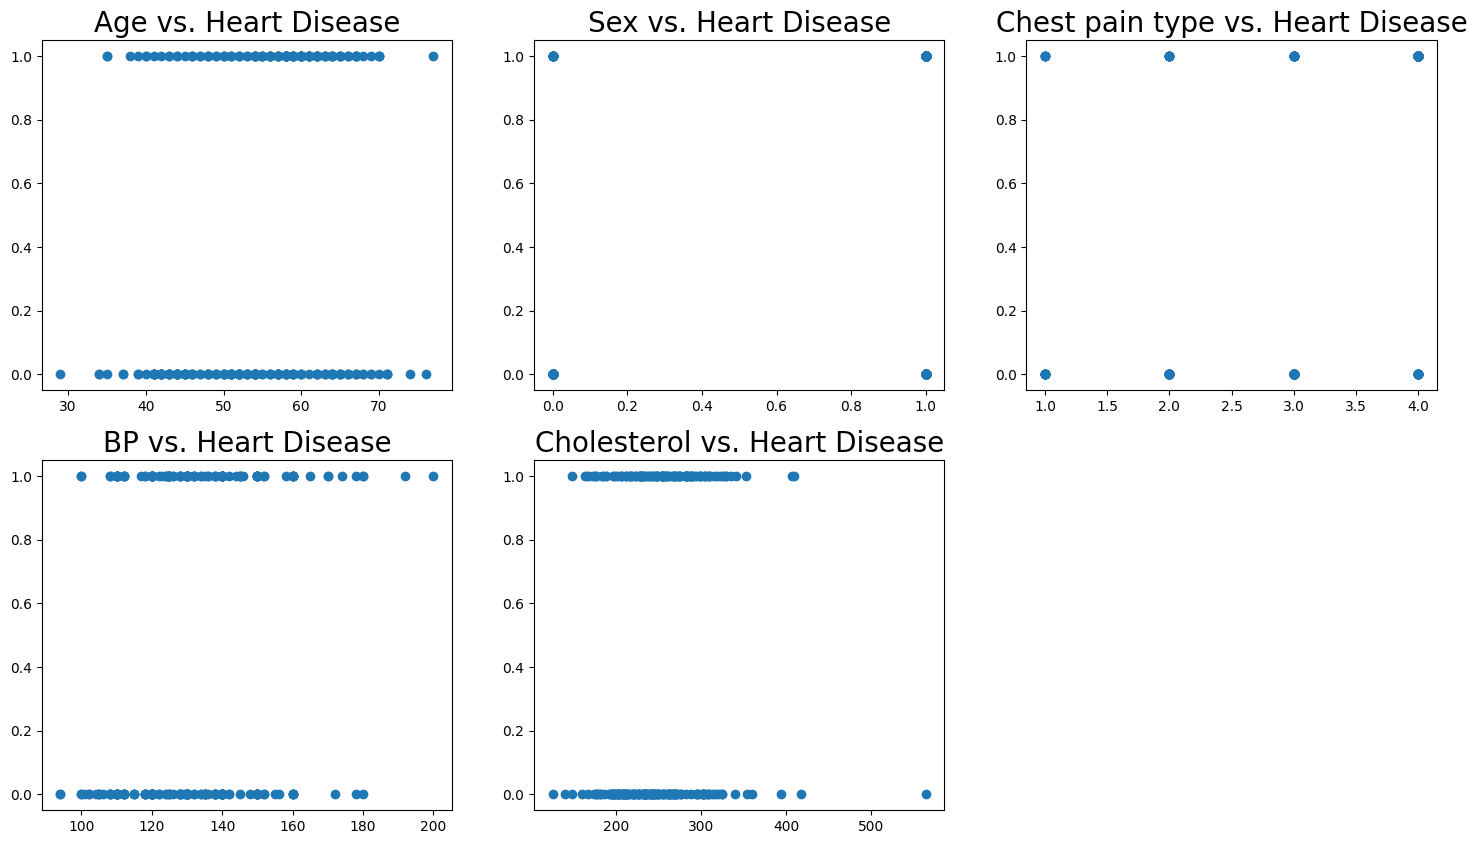

In [ ]:
l=list(cdf.index)
from matplotlib import gridspec
fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(2,3)
#f, ax = plt.subplots(nrows=1,ncols=len(l), sharey=True)
ax0 = plt.subplot(gs[0])
ax0.scatter(df[l[0]],df['Heart Disease'])
ax0.set_title(l[0]+" vs. Heart Disease", fontdict={'fontsize':20})

ax1 = plt.subplot(gs[1])
ax1.scatter(df[l[1]],df['Heart Disease'])
ax1.set_title(l[1]+" vs. Heart Disease",fontdict={'fontsize':20})

ax2 = plt.subplot(gs[2])
ax2.scatter(df[l[2]],df['Heart Disease'])
ax2.set_title(l[2]+" vs. Heart Disease",fontdict={'fontsize':20})

ax3 = plt.subplot(gs[3])
ax3.scatter(df[l[3]],df['Heart Disease'])
ax3.set_title(l[3]+" vs. Heart Disease",fontdict={'fontsize':20})

ax4 = plt.subplot(gs[4])
ax4.scatter(df[l[4]],df['Heart Disease'])
ax4.set_title(l[4]+" vs. Heart Disease",fontdict={'fontsize':20})

**R-square of the model fit**

In [ ]:
print("R-squared value of this fit:",round(metrics.r2_score(y_train,train_pred),3))

R-squared value of this fit: 0.585


### Prediction, error estimate, and regression evaluation matrices

**Prediction using the lm model**

In [ ]:
predictions = lm.predict(X_test)
print ("Type of the predicted object:", type(predictions))
print ("Size of the predicted object:", predictions.shape)

Type of the predicted object: <class 'numpy.ndarray'>
Size of the predicted object: (81,)


**Scatter plot of predicted price and y_test set to see if the data fall on a 45 degree straight line**

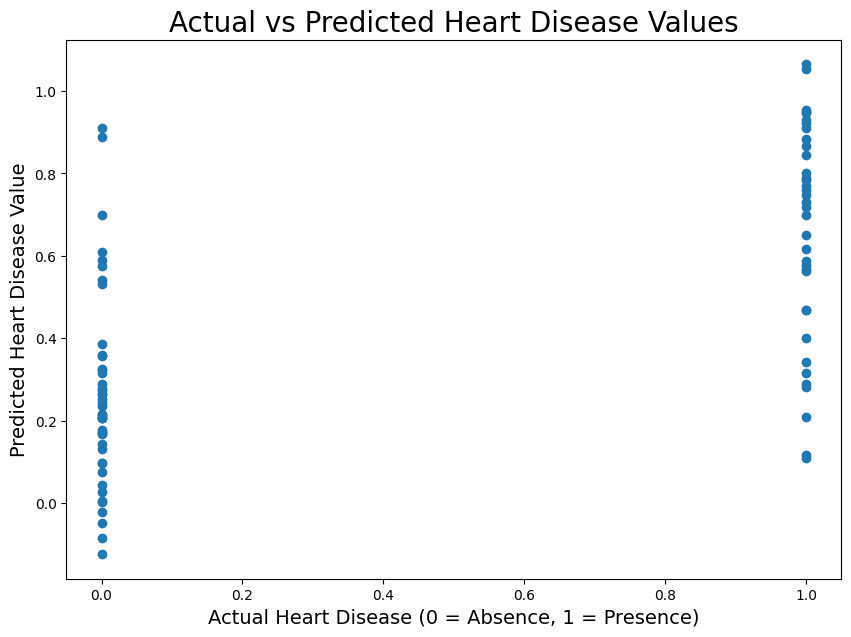

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Actual vs Predicted Heart Disease Values", fontsize=20)
plt.xlabel("Actual Heart Disease (0 = Absence, 1 = Presence)", fontsize=14)
plt.ylabel("Predicted Heart Disease Value", fontsize=14)

plt.scatter(x=y_test, y=predictions)
plt.show()


**Plotting histogram of the residuals i.e. predicted errors (expect a normally distributed pattern)**

<Axes: title={'center': 'Histogram of residuals to check for normality'}, xlabel='Residuals', ylabel='Kernel density'>

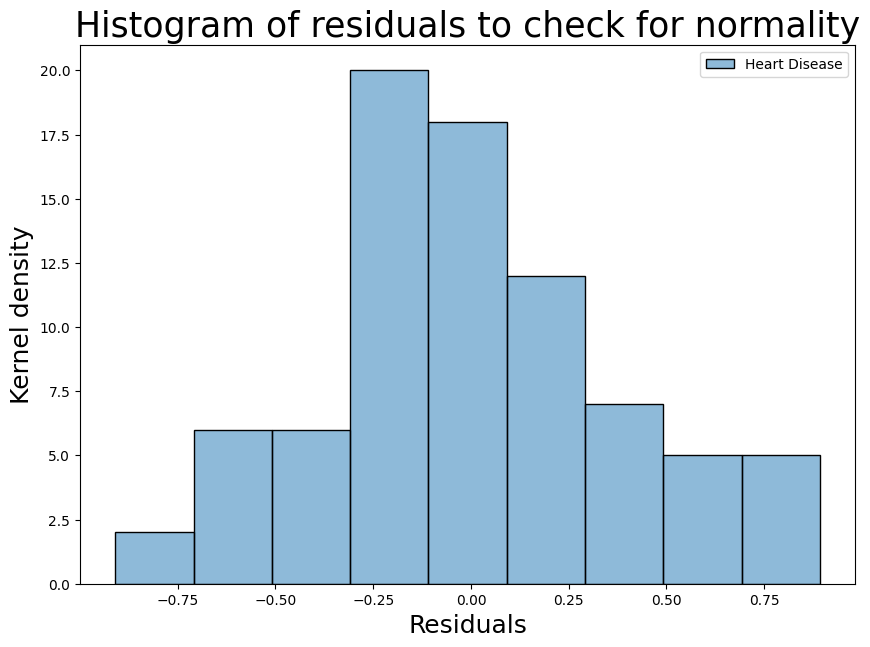

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Histogram of residuals to check for normality",fontsize=25)
plt.xlabel("Residuals",fontsize=18)
plt.ylabel("Kernel density", fontsize=18)
sns.histplot([y_test-predictions])

**Scatter plot of residuals and predicted values (Homoscedasticity)**

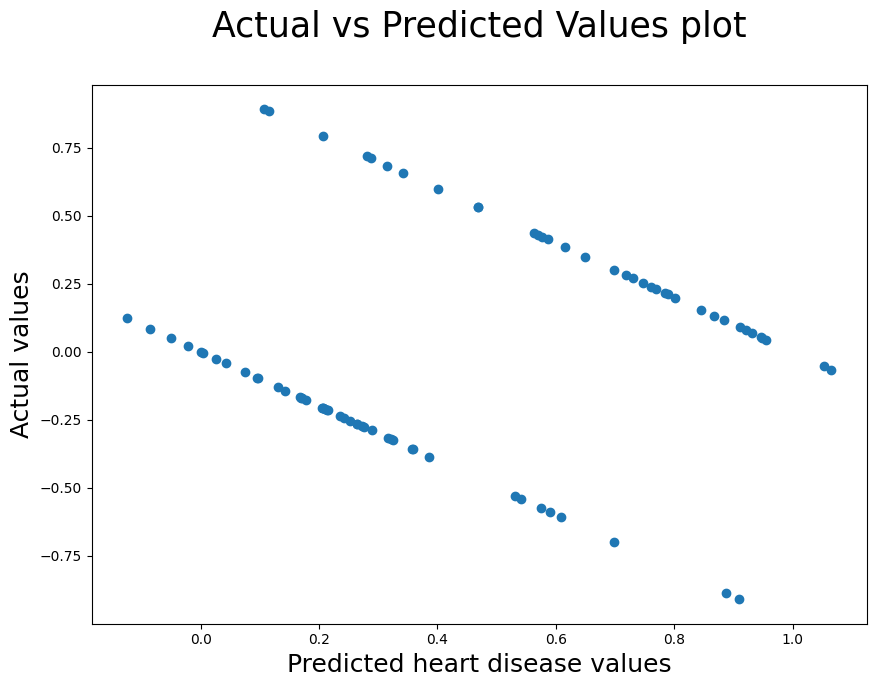

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Actual vs Predicted Values plot\n",fontsize=25)
plt.xlabel("Predicted heart disease values",fontsize=18)
plt.ylabel("Actual values", fontsize=18)
plt.scatter(x=predictions,y=y_test-predictions)

**Regression evaluation metrices**

In [ ]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean absolute error (MAE): 0.30746797855426744
Mean square error (MSE): 0.15012097685915277
Root mean square error (RMSE): 0.3874544835966578


**R-square value**

In [ ]:
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions),3))

R-squared value of predictions: 0.392


In [ ]:
#compute minmax value for observed price and expected price
import numpy as np
min=np.min(predictions/6000)
max=np.max(predictions/12000)
print(min, max)

-2.0774731027185225e-05 8.876734178319663e-05


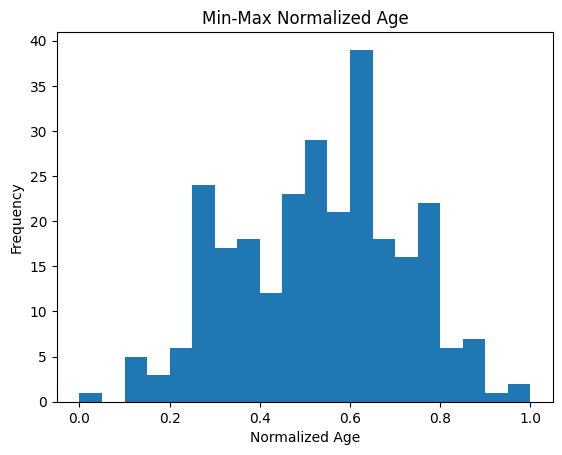

In [ ]:
age_min = df['Age'].min()
age_max = df['Age'].max()

L = (df['Age'] - age_min) / (age_max - age_min)

plt.hist(L, bins=20)
plt.title("Min-Max Normalized Age")
plt.xlabel("Normalized Age")
plt.ylabel("Frequency")
plt.show()


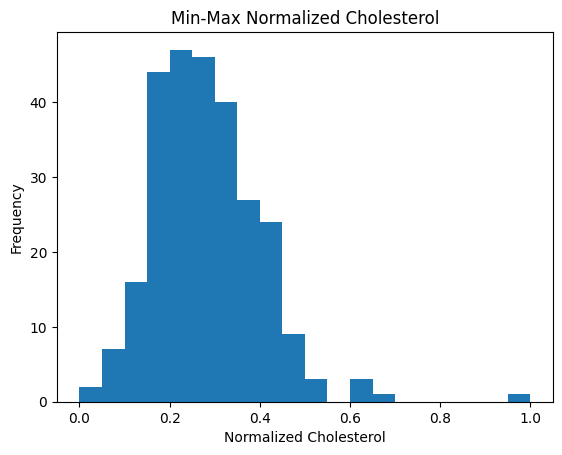

In [ ]:
chol_min = df['Cholesterol'].min()
chol_max = df['Cholesterol'].max()

L = (df['Cholesterol'] - chol_min) / (chol_max - chol_min)

plt.hist(L, bins=20)
plt.title("Min-Max Normalized Cholesterol")
plt.xlabel("Normalized Cholesterol")
plt.ylabel("Frequency")
plt.show()


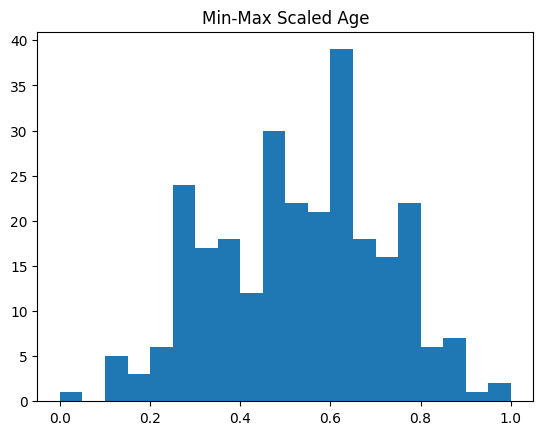

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_age = scaler.fit_transform(df[['Age']])

plt.hist(scaled_age, bins=20)
plt.title("Min-Max Scaled Age")
plt.show()
